<a href="https://colab.research.google.com/github/Nandhu2k3/Machine-learning-Regressions-predictions/blob/main/Self_organising_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [11]:
# Create a self-organizing map with the given size and input dimensionality
def create_som(x_size, y_size, input_size):
    som = np.random.rand(x_size, y_size, input_size)
    return som

In [12]:
# Find the best matching unit (BMU) for the given input vector
def find_bmu(som, input_vec):
    dists = np.sqrt(np.sum((som - input_vec)**2, axis=2))
    bmu = np.unravel_index(np.argmin(dists), dists.shape)
    return bmu


In [13]:
# Update the weights of the self-organizing map based on the given input vector and BMU
def update_weights(som, input_vec, bmu, learning_rate, radius):
    dists = np.sqrt(np.sum((np.indices(som.shape[:2]) - np.array(bmu)[:, np.newaxis, np.newaxis])**2, axis=0))
    kernel = np.exp(-dists**2 / (2 * radius**2))
    som += learning_rate * kernel[:, :, np.newaxis] * (input_vec - som)
    return som

In [15]:
# Train the self-organizing map on the given dataset for the given number of epochs
def train_som(som, data, num_epochs, init_learning_rate=0.1, init_radius=None):
    if init_radius is None:
        init_radius = max(som.shape) / 2
    for epoch in range(num_epochs):
        # Compute the learning rate and radius for this epoch
        learning_rate = init_learning_rate * np.exp(-epoch / num_epochs)
        radius = init_radius * np.exp(-epoch / num_epochs)
        # Update the weights of the self-organizing map for each input vector in the dataset
        for input_vec in data:
            bmu = find_bmu(som, input_vec)
            som = update_weights(som, input_vec, bmu, learning_rate, radius)
    return som

In [16]:
# Generate a dataset of random vectors
data = np.random.rand(100, 2)

In [17]:
# Create a self-organizing map with a 10x10 grid and 2 input features
som = create_som(10, 10, 2)


In [18]:
# Train the self-organizing map on the dataset for 100 epochs
som = train_som(som, data, 100)


In [20]:
# Select a feature to visualize (e.g. the first input feature)
feature_idx = 0


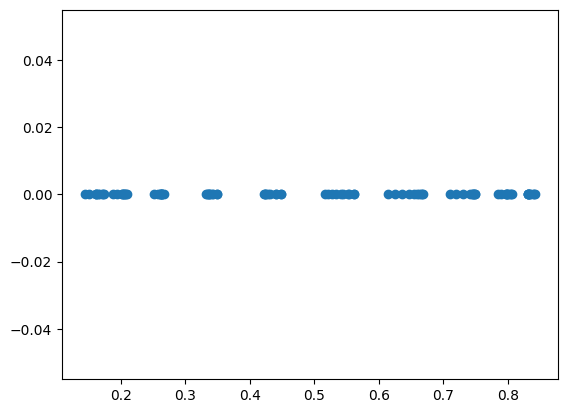

In [21]:
# Plot the self-organizing map using a color code to represent the selected feature
plt.scatter(som[:, :, feature_idx], np.zeros_like(som[:, :, feature_idx]))
plt.show()